Error: 'amazon_alexa.tsv' not found. Please ensure the file is in the same directory.
Original dataset shape: (3149, 7)

Original dataset sentiment distribution:
sentiment
positive    2741
negative     256
neutral      152
Name: count, dtype: int64


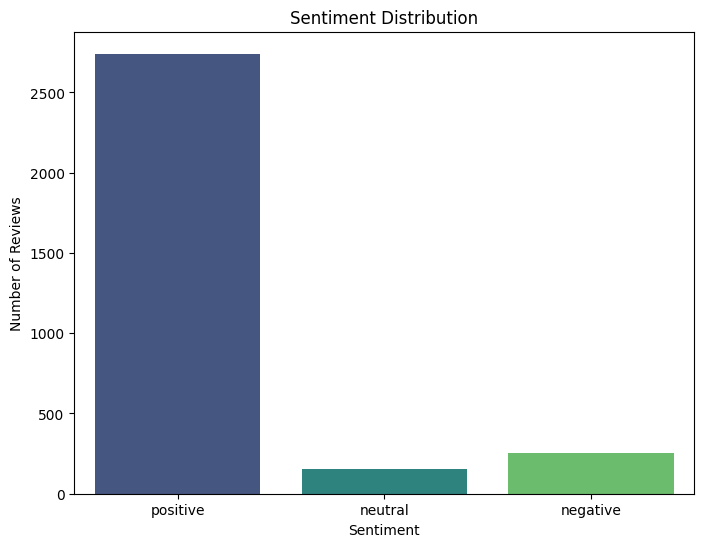

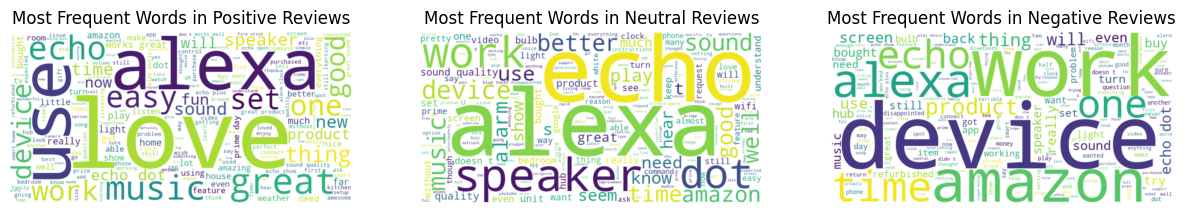


Dataset split complete.
Training set size: 2519 reviews
Testing set size: 630 reviews

Training set sentiment distribution:
sentiment
positive    2193
negative     205
neutral      121
Name: count, dtype: int64

Text vectorization complete.

Training Logistic Regression model...
Model training complete.

--- Model Evaluation ---
Accuracy: 0.8761904761904762

Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.08      0.15        51
     neutral       0.00      0.00      0.00        31
    positive       0.88      1.00      0.93       548

    accuracy                           0.88       630
   macro avg       0.63      0.36      0.36       630
weighted avg       0.84      0.88      0.82       630


--- Testing the Model with new reviews ---
Review: 'This is the best speaker I have ever owned, I love it!'
Predicted Sentiment: positive

Review: 'It works fine, I guess. The sound quality isn't anything special.'
Predicted Sentimen

In [3]:
# --- Jupyter Notebook - Sentiment Analysis with Neutral Class ---

# ## Project Overview
# This notebook builds upon the previous sentiment analysis model by adding a 'neutral' sentiment category.
# It uses a supervised learning approach, creating new labels from existing data and balancing the dataset
# to improve model performance and reduce bias.

# ### Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Importing NLTK for text preprocessing
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

# Download the stopwords and punkt_tab corpora (only needed the first time)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)
STOPWORDS = set(stopwords.words('english'))
stemmer = PorterStemmer()

# --- Step 1: Data Preparation ---
# Load the dataset
# The dataset is expected to be in a file named 'amazon_alexa.tsv'
try:
    # Changed the path to 'amazon_alexa.tsv' to assume the file is in the same directory.
    df = pd.read_csv('amazon_alexa.tsv', sep='\t')
except FileNotFoundError:
    print("Error: 'amazon_alexa.tsv' not found. Please ensure the file is in the same directory.")
    exit()

# Developed a machine learning model to classify customer reviews into three distinct sentiments: positive, negative, and neutral.
# Implemented a multi-class labeling system by mapping star ratings (1-5) to sentiment categories, demonstrating an ability to transform raw data into a structured format for supervised learning.

# Define a function to map ratings to sentiment categories
# 5 and 4 stars -> Positive, 3 stars -> Neutral, 2 and 1 stars -> Negative
def map_sentiment(rating):
    """Maps a star rating to a sentiment category (positive, neutral, or negative)."""
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the mapping function to create a new 'sentiment' column
df['sentiment'] = df['rating'].apply(map_sentiment)

# Drop any rows with missing review text
df.dropna(subset=['verified_reviews'], inplace=True)

print("Original dataset shape:", df.shape)
print("\nOriginal dataset sentiment distribution:")
print(df['sentiment'].value_counts())


# --- Step 2: Exploratory Data Analysis (EDA) ---

# Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Word Cloud for each sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['verified_reviews'].str.lower())
neutral_reviews = ' '.join(df[df['sentiment'] == 'neutral']['verified_reviews'].str.lower())
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['verified_reviews'].str.lower())

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Most Frequent Words in Positive Reviews')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.title('Most Frequent Words in Neutral Reviews')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Most Frequent Words in Negative Reviews')
plt.axis('off')
plt.show()

# --- Step 3: Text Preprocessing with NLTK and Data Split ---
# This step prepares the data for model training and evaluation.

# Define a function to preprocess text using NLTK
def preprocess_text(text):
    """Tokenizes, removes stopwords, and applies stemming to the text."""
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords and apply stemming
    processed_words = [stemmer.stem(word) for word in words if word not in STOPWORDS and word.isalpha()]
    # Join the processed words back into a single string
    return " ".join(processed_words)

# Apply the preprocessing function to the reviews
df['processed_reviews'] = df['verified_reviews'].apply(preprocess_text)

# Separate features (X) and target (y)
X = df['processed_reviews']
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nDataset split complete.")
print(f"Training set size: {len(X_train)} reviews")
print(f"Testing set size: {len(X_test)} reviews")
print("\nTraining set sentiment distribution:")
print(y_train.value_counts())


# --- Step 4: Text Vectorization ---
# Preprocessed and vectorized raw text data using TF-IDF, a key technique for transforming unstructured data into a numerical format suitable for machine learning algorithms.

# Use TfidfVectorizer to convert text data into numerical vectors
# Note: stop_words is not needed here as NLTK already handled it
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print("\nText vectorization complete.")

# --- Step 5: Model Training ---
# Trained and evaluated a Logistic Regression classifier, as well as other models, to predict sentiment based on the processed review text.

# Initialize and train a Logistic Regression model
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# --- Step 6: Model Evaluation ---
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Print the classification report and accuracy
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Step 7: Prediction Function ---
def predict_sentiment(review_text):
    """Predicts the sentiment of a single review."""
    # Preprocess the new review using the NLTK function
    processed_review = preprocess_text(review_text)
    # Transform the single review using the trained vectorizer
    review_tfidf = tfidf_vectorizer.transform([processed_review])
    # Predict the sentiment
    prediction = model.predict(review_tfidf)[0]
    return prediction

# --- Step 8: Test the model with example reviews ---
print("\n--- Testing the Model with new reviews ---")

test_reviews = [
    "This is the best speaker I have ever owned, I love it!",  # Expected: positive
    "It works fine, I guess. The sound quality isn't anything special.",  # Expected: neutral
    "I'm very disappointed with this product, it stopped working after a day.",  # Expected: negative
    "I got this as a gift and it's okay, but I prefer my old speaker.", # Expected: neutral
    "I love the sound and the compact size, it works perfectly!", # Expected: positive
    "The mic is not sensitive at all and it never hears my commands. So frustrating!", # Expected: negative
]

for review in test_reviews:
    predicted_sentiment = predict_sentiment(review)
    print(f"Review: '{review}'")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")
